In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую 
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения 
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)): binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид 
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))
    for i in range(len(Y)): 
        l = layer2[i]
        for j in range(len(l)): 
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная 
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis)) 
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


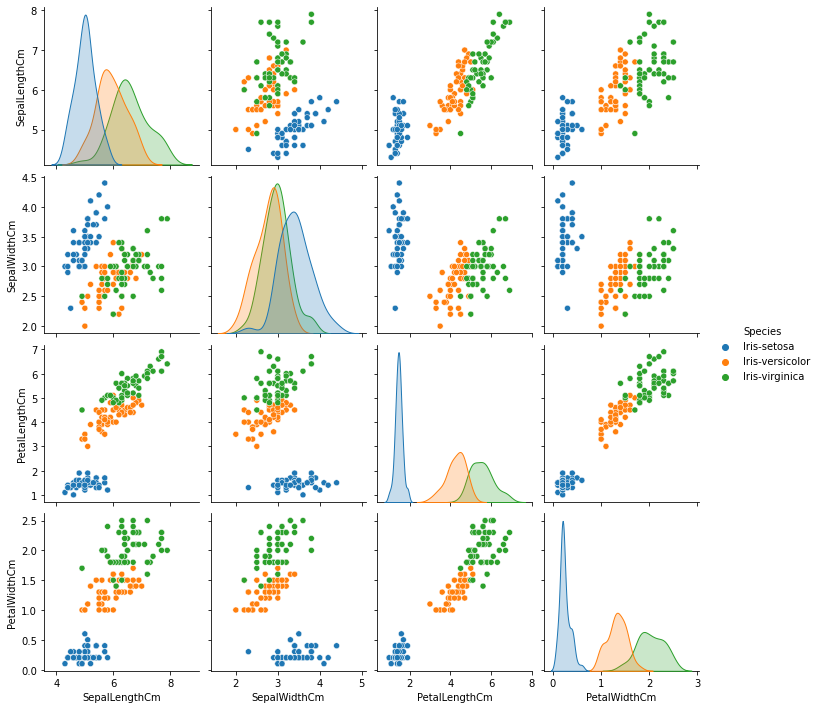

In [4]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species") 
plt.show()

In [17]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов) 
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns) 
y = y.values
y = y.flatten()
y = to_one_hot(y)


# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [26]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
neuron_numb = 5
w0 = 2*np.random.random((4, neuron_numb)) - 1 
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate) 
n = 0.1

# массив для ошибок, чтобы потом построить график 
errors_train = []

# процесс обучения
for i in range(10000):
    # прямое распространение(feed forward) 
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0)) 
    layer2 = sigmoid(np.dot(layer1, w1))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors_train.append(error)
    
    accuracy = (1 - error) * 100

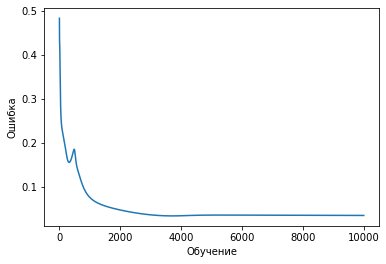

Точность нейронной сети 96.54%


In [27]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения 
plt.plot(errors_train)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [28]:
# прямое распространение(feed forward) на тестовых данных
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0)) 
layer2 = sigmoid(np.dot(layer1, w1))
error = np.mean(np.abs(y_test - layer2))
accuracy = (1 - error) * 100

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 96.55%


Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить её точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению её точности?

Посмотрим как на результат будет сказываться изменение количества нейронов на внутреннем слое:

In [44]:
neuron_numb_list = [3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]

In [45]:
errors_train = []
accuracy_train = []
errors_test = []
accuracy_test = []

for neuron_numb in neuron_numb_list:

    w0 = 2*np.random.random((4, neuron_numb)) - 1 
    w1 = 2*np.random.random((neuron_numb, 3)) - 1

    # скорость обучения (learning rate) 
    n = 0.1

    # процесс обучения
    for i in range(10000):
        # прямое распространение(feed forward) 
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0)) 
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors_train.append(error)
    accuracy_train.append((1 - error) * 100)
    
    # прямое распространение(feed forward) на тестовых данных
    layer0 = X_test
    layer1 = sigmoid(np.dot(layer0, w0)) 
    layer2 = sigmoid(np.dot(layer1, w1))
    
    error_test = np.mean(np.abs(y_test - layer2))
    errors_test.append(error_test)
    accuracy_test.append((1 - error_test) * 100)

Text(0, 0.5, 'Точность на тесте')

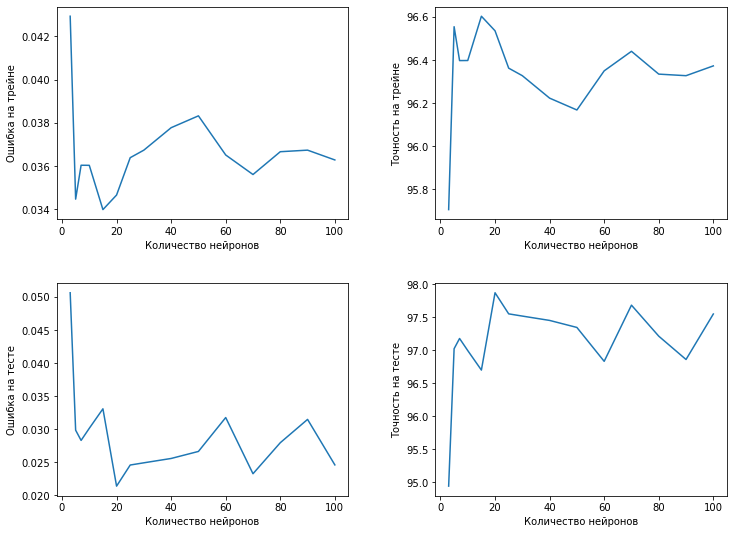

In [47]:
fig, ax = subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(12, 9)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(neuron_numb_list, errors_train)
ax1.set_xlabel('Количество нейронов')
ax1.set_ylabel('Ошибка на трейне')

ax2.plot(neuron_numb_list, accuracy_train)
ax2.set_xlabel('Количество нейронов')
ax2.set_ylabel('Точность на трейне')

ax3.plot(neuron_numb_list, errors_test)
ax3.set_xlabel('Количество нейронов')
ax3.set_ylabel('Ошибка на тесте')

ax4.plot(neuron_numb_list, accuracy_test)
ax4.set_xlabel('Количество нейронов')
ax4.set_ylabel('Точность на тесте')

Как видно из графиков, увеличение количества нейронов на внутреннем слое позволяет улучшить результат, но с определённого порога, наоборот начинает отрицателно сказываться на точности модели. Оставим значение 20 для дальнейшего исследования.

Посмотрим как на результат будет сказываться изменение количества эпох обучения:

In [51]:
epoch_list = [100, 500, 1000, 5000, 10000, 20000, 30000, 50000, 75000, 100000]

In [52]:
errors_train = []
accuracy_train = []
errors_test = []
accuracy_test = []

for epoch in epoch_list:
    neuron_numb = 20
    w0 = 2*np.random.random((4, neuron_numb)) - 1 
    w1 = 2*np.random.random((neuron_numb, 3)) - 1

    # скорость обучения (learning rate) 
    n = 0.1

    # процесс обучения
    for i in range(epoch):
        # прямое распространение(feed forward) 
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0)) 
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors_train.append(error)
    accuracy_train.append((1 - error) * 100)
    
    # прямое распространение(feed forward) на тестовых данных
    layer0 = X_test
    layer1 = sigmoid(np.dot(layer0, w0)) 
    layer2 = sigmoid(np.dot(layer1, w1))
    
    error_test = np.mean(np.abs(y_test - layer2))
    errors_test.append(error_test)
    accuracy_test.append((1 - error_test) * 100)

Text(0, 0.5, 'Точность на тесте')

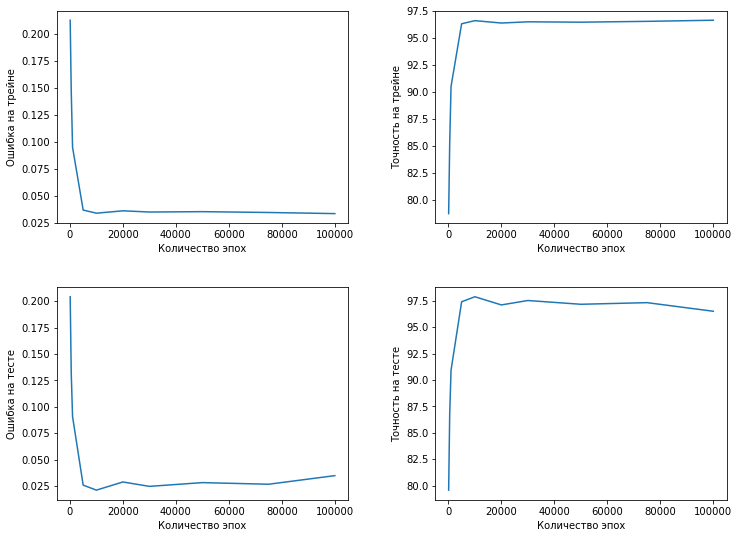

In [53]:
fig, ax = subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(12, 9)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(epoch_list, errors_train)
ax1.set_xlabel('Количество эпох')
ax1.set_ylabel('Ошибка на трейне')

ax2.plot(epoch_list, accuracy_train)
ax2.set_xlabel('Количество эпох')
ax2.set_ylabel('Точность на трейне')

ax3.plot(epoch_list, errors_test)
ax3.set_xlabel('Количество эпох')
ax3.set_ylabel('Ошибка на тесте')

ax4.plot(epoch_list, accuracy_test)
ax4.set_xlabel('Количество эпох')
ax4.set_ylabel('Точность на тесте')

Количество эпох обучения также сказывается на точности модели нелинейно. В нашем случае максимольная точность достигается при 10000 эпох. С дальнейшим увеличением количества эпох качество модели незначительно изменяется, причём не всегда в лучшую сторону.

Рассмотрим параметр скорости обучения.

In [54]:
learning_rate_list = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

In [55]:
errors_train = []
accuracy_train = []
errors_test = []
accuracy_test = []

for n in learning_rate_list:
    neuron_numb = 20
    w0 = 2*np.random.random((4, neuron_numb)) - 1 
    w1 = 2*np.random.random((neuron_numb, 3)) - 1
    
    epoch = 10000

    # процесс обучения
    for i in range(epoch):
        # прямое распространение(feed forward) 
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0)) 
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors_train.append(error)
    accuracy_train.append((1 - error) * 100)
    
    # прямое распространение(feed forward) на тестовых данных
    layer0 = X_test
    layer1 = sigmoid(np.dot(layer0, w0)) 
    layer2 = sigmoid(np.dot(layer1, w1))
    
    error_test = np.mean(np.abs(y_test - layer2))
    errors_test.append(error_test)
    accuracy_test.append((1 - error_test) * 100)

Text(0, 0.5, 'Точность на тесте')

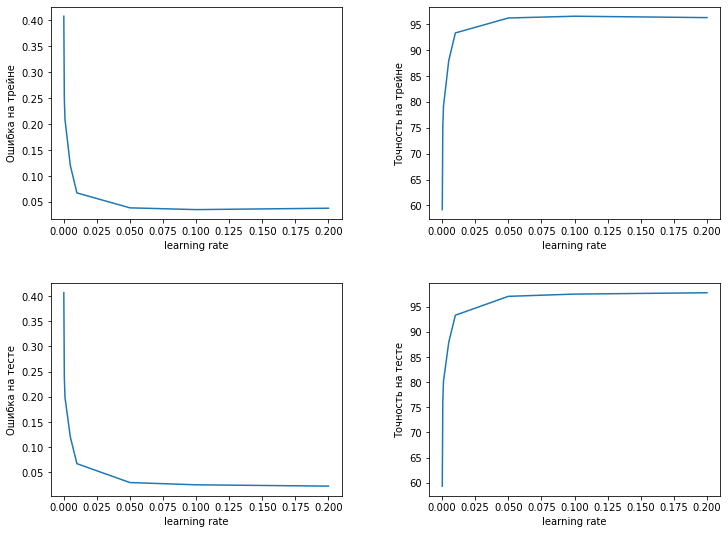

In [57]:
fig, ax = subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(12, 9)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.plot(learning_rate_list, errors_train)
ax1.set_xlabel('learning rate')
ax1.set_ylabel('Ошибка на трейне')

ax2.plot(learning_rate_list, accuracy_train)
ax2.set_xlabel('learning rate')
ax2.set_ylabel('Точность на трейне')

ax3.plot(learning_rate_list, errors_test)
ax3.set_xlabel('learning rate')
ax3.set_ylabel('Ошибка на тесте')

ax4.plot(learning_rate_list, accuracy_test)
ax4.set_xlabel('learning rate')
ax4.set_ylabel('Точность на тесте')

При очень малом шаге обучения модель не успевает обучаться. 